In [1]:
import requests   # Importing requests to extract content from a url
import re 

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

In [2]:
!pip install tweepy

In [3]:
import pandas as pd
import tweepy 


In [4]:
#Twitter API credentials
consumer_key = "J2SG0K7CP8PlnqxfCC6X4qqYt"
consumer_secret = "BX0vPEOySfEY4kLaOBUHBHxLKj1njiUbhWzZMQTWj0OBifnbka"
access_key = "1146289980064632839-9NqGJVUSmFIv1neU3k6m5KcDTcmyKo"
access_secret = "GyoxlWMzXRquiKDwxbqaMRuIsD3oOn6F1B5zzVOS7izOp"

In [5]:
alltweets = []

In [6]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

I_srk = get_all_tweets("iamsrk")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1599 tweets downloaded so far
...1799 tweets downloaded so far
...1999 tweets downloaded so far
...2199 tweets downloaded so far
...2399 tweets downloaded so far
...2599 tweets downloaded so far
...2799 tweets downloaded so far
...2999 tweets downloaded so far
...3199 tweets downloaded so far
...3249 tweets downloaded so far
...3249 tweets downloaded so far


In [7]:
I_srk

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-04-21 18:23:25,[],"[{'screen_name': 'KKRiders', 'name': 'KolkataK...",31047,None,1384935820956774400,en,None,4467,False,Twitter for iPhone,Coulda...woulda...shoulda can take a backseat ...,,Shah Rukh Khan,None,None
1,2021-04-13 17:50:54,[],"[{'screen_name': 'KKRiders', 'name': 'KolkataK...",124784,None,1382028536949600259,en,None,11425,False,Twitter for iPhone,Disappointing performance. to say the least @K...,,Shah Rukh Khan,None,None
2,2021-04-11 17:43:12,"[{'text': 'Rahul', 'indices': [106, 112]}]","[{'screen_name': 'KKRiders', 'name': 'KolkataK...",70561,None,1381301821256261636,en,None,7296,False,Twitter for iPhone,Good to hav our 100th IPL match win. Well done...,,Shah Rukh Khan,None,None
3,2021-04-08 05:54:03,[],[],25547,None,1380036194264772609,en,None,2947,False,Twitter for iPhone,My condolences to you and the family my friend...,,Shah Rukh Khan,None,None
4,2021-04-02 03:05:27,[],"[{'screen_name': 'MeerFoundation', 'name': 'Me...",28763,None,1377819439609966593,en,None,4279,False,Twitter for iPhone,Can't wait to meet these lovely women in perso...,,Shah Rukh Khan,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,2016-10-24 22:33:59,[],[],18739,None,790682777750495232,en,None,5190,False,Tweetbot for iΟS,"Outside a cold Budapest nightclub, my date wen...",,Shah Rukh Khan,None,None
3245,2016-10-24 20:16:30,[],[],8855,None,790648181474234368,en,None,2684,False,Twitter for iPhone,Oops... The flip side of technology! First the...,,Shah Rukh Khan,None,None
3246,2016-10-24 13:07:04,[],"[{'screen_name': 'aliaa08', 'name': 'Alia Bhat...",5417,None,790540109825310720,en,None,2062,False,Tweetbot for iΟS,@aliaa08 @gauris oh oh me being an early sleep...,,Shah Rukh Khan,None,None
3247,2016-10-24 13:03:57,[],"[{'screen_name': 'kiranshaw', 'name': 'Kiran M...",2966,None,790539327671529472,en,None,1335,False,Tweetbot for iΟS,@kiranshaw congratulations my friend.,,Shah Rukh Khan,None,None


In [8]:
# Writing reviews into text file 
with open("twitter_srk.txt","w",encoding="utf-8") as snp:
    snp.write(str(I_srk))

In [9]:
 # Joinining all the twitter srk reviews into single paragraph 
ip_rev_string = " ".join(I_srk)

In [10]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [11]:
# words that contained in twitter srk 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

In [12]:
ip_reviews_words

['time',
 'hashtags',
 'user',
 'mentions',
 'favorite',
 'count',
 'geo',
 'id',
 'str',
 'lang',
 'place',
 'retweet',
 'count',
 'retweeted',
 'source',
 'text',
 'location',
 'name',
 'time',
 'zone',
 'utc',
 'offset']

In [18]:
#stop_words = set(stopwords.words('english'))

with open("stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

In [19]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [20]:
ip_reviews_words

['time',
 'hashtags',
 'user',
 'mentions',
 'favorite',
 'count',
 'geo',
 'id',
 'str',
 'lang',
 'place',
 'retweet',
 'count',
 'retweeted',
 'source',
 'text',
 'location',
 'time',
 'zone',
 'utc',
 'offset']

In [21]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

In [22]:
ip_rev_string

'time hashtags user mentions favorite count geo id str lang place retweet count retweeted source text location time zone utc offset'

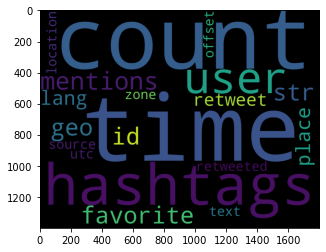

In [23]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [24]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]

In [25]:
poswords

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

In [26]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]

In [27]:
negwords

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',

In [28]:
# negative word cloud : below code signifies that there is no negative words

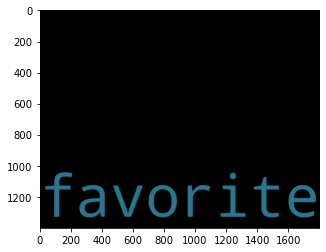

In [39]:
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

In [36]:
#which actually shows there is no negative words

In [37]:
# Positive word cloud

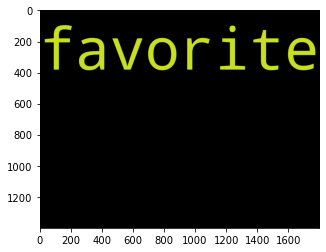

In [38]:
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)